In [1]:
#!pip install ktrain

# 1. Loading Datasets

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [3]:
train_data = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
test_data = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')

print('Training Data: ', train_data.shape)
print('Testing Data: ', test_data.shape)

Training Data:  (7613, 5)
Testing Data:  (3263, 4)


In [4]:
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


* Text : Text from the tweet
* Keyword: A particular keyword from the tweet (This maybe blank)
* Location: Location from where the tweet was sent (This maybe blank)
* Target: Denotes whether a tweet is about real disaster (1) or not(0)

In [5]:
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


 # 2.  Exploratory Data Analysis and Feature Engineering

> ##   2. 1 Training Dataset 

>> ## 2.1.1 Distribution of Target Variable

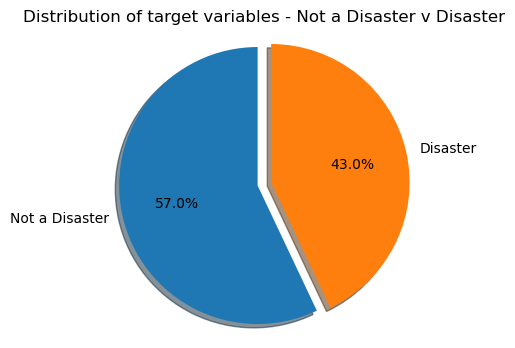

Not a disaster Count:  4342
Disaster Count:  3271


In [6]:
#Calculating distribution of target variable

disaster = train_data[train_data['target'] == 1]['target'].count()
not_disaster = train_data[train_data['target']==0]['target'].count()
labels = ['Not a Disaster', 'Disaster']
sizes = [not_disaster, disaster]
explode = (0,0.1)

#creating a pie chart
fig, axs = plt.subplots(figsize = (4,4))
axs.pie(sizes, labels=labels, explode = explode, startangle = 90, shadow = True, autopct = '%1.1f%%')
axs.axis('equal')
plt.title('Distribution of target variables - Not a Disaster v Disaster')
plt.show()

print('Not a disaster Count: ', not_disaster)
print('Disaster Count: ', disaster)

This shows a fairly balanced data so we can move forward

>> ## 2.2.2 Adjusting Missing Values

In [7]:
missing_values = train_data.isnull().sum()
print(missing_values)

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64


In [8]:
# Subset the data into two groups: tweets with missing location and tweets with non-missing location
missing_location_tweets = train_data[train_data['location'].isnull()]
non_missing_location_tweets = train_data[~train_data['location'].isnull()]

# Compare the distribution of the 'target' variable for the two groups
target_missing_location = missing_location_tweets['target'].value_counts()
target_non_missing_location = non_missing_location_tweets['target'].value_counts()

print("Target variable distribution for missing 'location' values:")
print(target_missing_location)

print("Target variable distribution for non-missing 'location' values:")
print(target_non_missing_location)


Target variable distribution for missing 'location' values:
0    1458
1    1075
Name: target, dtype: int64
Target variable distribution for non-missing 'location' values:
0    2884
1    2196
Name: target, dtype: int64


From basic logic we can infer that 'location' doesn't affect the target variable so we can drop the column 

>> ## 2.2.3 Dropping Irrelevant Columns

In [9]:
train_data.drop(['location'], inplace= True, axis = 1)

In [10]:
train_data.head()

,id,keyword,text,target
0,1,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,Just got sent this photo from Ruby #Alaska as ...,1


>> ## 2.2.4 Data Cleaning 

In [11]:
train_data['keyword'].fillna('',inplace=True)
train_data['text'] = train_data['text'] + ' ' + train_data['keyword']
train_data['text'] = train_data['text'].apply(lambda x: x.strip())
train_data.drop(['keyword'],axis=1,inplace=True)

In [12]:
train_data.head(10)

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1
5,8,#RockyFire Update => California Hwy. 20 closed...,1
6,10,#flood #disaster Heavy rain causes flash flood...,1
7,13,I'm on top of the hill and I can see a fire in...,1
8,14,There's an emergency evacuation happening now ...,1
9,15,I'm afraid that the tornado is coming to our a...,1


In [13]:
#pd.set_option('display.max_colwidth', None)
#print(train_data['text'])
#pd.reset_option('display.max_colwidth')

In [14]:
#Removing URL and special characters from the dataset

import re

def remove_url_and_special_char(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # Remove special characters and punctuation
    text = re.sub(r'[^\w\s]', '', text)

    return text

train_data['text'] = train_data['text'].apply(remove_url_and_special_char)

In [15]:
#pd.set_option('display.max_colwidth', None)
#print(train_data['text'])
#pd.reset_option('display.max_colwidth')

In [16]:
duplicated_records = train_data[train_data.duplicated(['text', 'target'], keep = False)]
print('Number of Records with duplicated text and target values: ', len(duplicated_records))
duplicated_records.head(10)
train_data.shape

Number of Records with duplicated text and target values:  798


(7613, 3)

In [17]:
#Removing the records with duplicated text and values
train_data.drop_duplicates(['text', 'target'], inplace=True)

In [18]:
train_data.shape

(7065, 3)

In [19]:
# Now finding Contradicting records having the same text but different target value from the dataset and randomly choosing 
# one record to be kept in the dataset and removing the contradictory record and finally resetting the indices

contradicting_records = train_data[train_data.duplicated(['text'], keep = False)]
print(' Number of records that are contradictory : ', len(contradicting_records))
contradicting_records.head(10)

 Number of records that are contradictory :  132


,id,text,target
246,349,US National Park Services Tonto National Fores...,0
248,353,World Annihilation vs Self Transformation Ali...,0
251,356,US National Park Services Tonto National Fores...,1
269,390,World Annihilation vs Self Transformation Ali...,1
547,796,STAR WARS POWER OF THE JEDI COLLECTION 1 BATTL...,1
569,822,STAR WARS POWER OF THE JEDI COLLECTION 1 BATTL...,0
576,834,FedEx no longer to transport bioterror germs i...,1
584,843,FedEx no longer to transport bioterror germs i...,0
587,848,world FedEx no longer to transport bioterror g...,1
591,853,world FedEx no longer to transport bioterror g...,0


In [20]:
records_to_remove = contradicting_records.sample(frac=1).groupby('text').head(1)
train_data.drop(records_to_remove.index, inplace=True)
train_data.reset_index(drop=True, inplace=True)

In [21]:
train_data.shape

(6999, 3)

> # 2.2 Testing Dataset

>> ## 2.2.1 Data Cleaning

In [22]:
test_data['keyword'].fillna('',inplace=True)
test_data['text'] = test_data['text'] + ' ' + test_data['keyword']
test_data['text'] = test_data['text'].apply(lambda x: x.strip())
test_data.drop(['keyword'],axis=1,inplace=True)
test_data.drop(['location'],axis=1,inplace=True)


In [23]:
test_data.head()

,id,text
0,0,Just happened a terrible car crash
1,2,"Heard about #earthquake is different cities, s..."
2,3,"there is a forest fire at spot pond, geese are..."
3,9,Apocalypse lighting. #Spokane #wildfires
4,11,Typhoon Soudelor kills 28 in China and Taiwan


In [24]:
test_data['text'] = test_data['text'].apply(remove_url_and_special_char)

# 3. Tokenization

In [25]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

def tokenize(text):
    tokens = word_tokenize(text)
    
    # Remove stopwords and filter out specific word types
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words and not token.isdigit() and token.lower() not in ['a', 'an', 'the'] and nltk.pos_tag([token])[0][1] != 'PRP']
    
    return filtered_tokens

train_data['tokens'] = train_data['text'].apply(tokenize)

test_data['tokens'] = test_data['text'].apply(tokenize)


In [26]:
test_data.head()

,id,text,tokens
0,0,Just happened a terrible car crash,"[happened, terrible, car, crash]"
1,2,Heard about earthquake is different cities sta...,"[Heard, earthquake, different, cities, stay, s..."
2,3,there is a forest fire at spot pond geese are ...,"[forest, fire, spot, pond, geese, fleeing, acr..."
3,9,Apocalypse lighting Spokane wildfires,"[Apocalypse, lighting, Spokane, wildfires]"
4,11,Typhoon Soudelor kills 28 in China and Taiwan,"[Typhoon, Soudelor, kills, China, Taiwan]"


In [27]:
train_data.head(10)

,id,text,target,tokens
0,1,Our Deeds are the Reason of this earthquake Ma...,1,"[Deeds, Reason, earthquake, May, ALLAH, Forgive]"
1,4,Forest fire near La Ronge Sask Canada,1,"[Forest, fire, near, La, Ronge, Sask, Canada]"
2,5,All residents asked to shelter in place are be...,1,"[residents, asked, shelter, place, notified, o..."
3,6,13000 people receive wildfires evacuation orde...,1,"[people, receive, wildfires, evacuation, order..."
4,7,Just got sent this photo from Ruby Alaska as s...,1,"[got, sent, photo, Ruby, Alaska, smoke, wildfi..."
5,8,RockyFire Update California Hwy 20 closed in ...,1,"[RockyFire, Update, California, Hwy, closed, d..."
6,10,flood disaster Heavy rain causes flash floodin...,1,"[flood, disaster, Heavy, rain, causes, flash, ..."
7,13,Im on top of the hill and I can see a fire in ...,1,"[Im, top, hill, see, fire, woods]"
8,14,Theres an emergency evacuation happening now i...,1,"[Theres, emergency, evacuation, happening, bui..."
9,15,Im afraid that the tornado is coming to our area,1,"[Im, afraid, tornado, coming, area]"


In [28]:
data = pd.concat([train_data, test_data], axis = 0, sort = False)
data.drop(['target'],axis=1,inplace=True)
data.head()

,id,text,tokens
0,1,Our Deeds are the Reason of this earthquake Ma...,"[Deeds, Reason, earthquake, May, ALLAH, Forgive]"
1,4,Forest fire near La Ronge Sask Canada,"[Forest, fire, near, La, Ronge, Sask, Canada]"
2,5,All residents asked to shelter in place are be...,"[residents, asked, shelter, place, notified, o..."
3,6,13000 people receive wildfires evacuation orde...,"[people, receive, wildfires, evacuation, order..."
4,7,Just got sent this photo from Ruby Alaska as s...,"[got, sent, photo, Ruby, Alaska, smoke, wildfi..."


In [29]:
data.shape

(10262, 3)

# 4. Glove Vector Embedding 

In [30]:
# Glove vector embeddings:

glove_vec_file = open('/kaggle/input/glove6b/glove.6B.300d.txt')
embeddings = {}
for line in glove_vec_file:
    value = line.split()
    word = value[0]
    embedding = np.array(value[1:])
    embeddings[word] = embedding
glove_vec_file.close()

In [31]:
def embeddings_out(data, max_len = 20):
    output = np.zeros((data.shape[0], 20, 300))
    for row in range(len(data)):
        curr_length = min(max_len, len(data.iloc[row]['tokens']))
        for token in range(curr_length):
            word = str(data.iloc[row]['tokens'][token])
            if word in embeddings:
                output[row][token] = embeddings[data.iloc[row]['tokens'][token]]
    return output 

X = embeddings_out(data)


In [32]:
X.shape

(10262, 20, 300)

# 5. Model Train/Test Split

In [33]:
x_train, x_test, y_train = X[:len(train_data)], X[len(train_data):], train_data['target'].values

In [34]:
print(" x_train: ", len(x_train))
print(" x_test: ", len(x_test))
print(" y_train: ", len(y_train))

 x_train:  6999
 x_test:  3263
 y_train:  6999


> # 5. 1 Modeling - LSTM 

In [35]:
from keras.layers import LSTM, Dense, Dropout, Activation
from keras.models import Sequential 
from keras.callbacks import EarlyStopping

In [36]:

def create_model():
    model = Sequential()
    model.add(LSTM(64, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(64, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(64, input_shape=(X.shape[1], X.shape[2])))
    model.add(Dropout(0.1))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model
    

In [37]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 64)            93440     
                                                                 
 dropout (Dropout)           (None, 20, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 20, 64)            33024     
                                                                 
 dropout_1 (Dropout)         (None, 20, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 64)                4

In [38]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

hist = model.fit(x_train,y_train,epochs=100,batch_size=64,shuffle=True,validation_split=0.1,callbacks=[early_stop])

Epoch 1/100
99/99 [==============================] - 15s 73ms/step - loss: 0.5570 - accuracy: 0.7293 - val_loss: 0.5552 - val_accuracy: 0.7271
Epoch 2/100
99/99 [==============================] - 6s 59ms/step - loss: 0.4918 - accuracy: 0.7774 - val_loss: 0.5286 - val_accuracy: 0.7357
Epoch 3/100
99/99 [==============================] - 6s 58ms/step - loss: 0.4633 - accuracy: 0.7933 - val_loss: 0.5615 - val_accuracy: 0.7157
Epoch 4/100
99/99 [==============================] - 6s 58ms/step - loss: 0.4348 - accuracy: 0.8077 - val_loss: 0.5633 - val_accuracy: 0.7057
Epoch 5/100
99/99 [==============================] - 6s 57ms/step - loss: 0.4084 - accuracy: 0.8176 - val_loss: 0.5612 - val_accuracy: 0.7271
Epoch 6/100
99/99 [==============================] - 6s 57ms/step - loss: 0.3767 - accuracy: 0.8392 - val_loss: 0.5645 - val_accuracy: 0.7243
Epoch 7/100
99/99 [==============================] - 6s 58ms/step - loss: 0.3566 - accuracy: 0.8457 - val_loss: 0.5946 - val_accuracy: 0.7171
Epoch

In [39]:
model = create_model()
history = model.fit(x=x_train,y=y_train,
          batch_size=64,epochs=20,shuffle=True)

Epoch 1/20
110/110 [==============================] - 13s 54ms/step - loss: 0.5614 - accuracy: 0.7241
Epoch 2/20
110/110 [==============================] - 6s 53ms/step - loss: 0.4900 - accuracy: 0.7751
Epoch 3/20
110/110 [==============================] - 6s 55ms/step - loss: 0.4629 - accuracy: 0.7868
Epoch 4/20
110/110 [==============================] - 6s 57ms/step - loss: 0.4342 - accuracy: 0.8035
Epoch 5/20
110/110 [==============================] - 6s 55ms/step - loss: 0.4104 - accuracy: 0.8171
Epoch 6/20
110/110 [==============================] - 6s 55ms/step - loss: 0.3909 - accuracy: 0.8290
Epoch 7/20
110/110 [==============================] - 6s 54ms/step - loss: 0.3561 - accuracy: 0.8443
Epoch 8/20
110/110 [==============================] - 6s 56ms/step - loss: 0.3307 - accuracy: 0.8558
Epoch 9/20
110/110 [==============================] - 7s 60ms/step - loss: 0.3115 - accuracy: 0.8713
Epoch 10/20
110/110 [==============================] - 6s 55ms/step - loss: 0.2821 - accur

In [40]:
pred = (model.predict(x_test) > 0.5).astype("int32")
pred

102/102 [==============================] - 3s 15ms/step


array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int32)

In [41]:
result = pd.DataFrame()
result['id'] = test_data['id']
result['target'] = pred
result.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


In [42]:
result.to_csv('submission_LSTM.csv',index=False)

> # 5.2 Modelling - BERT